1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step


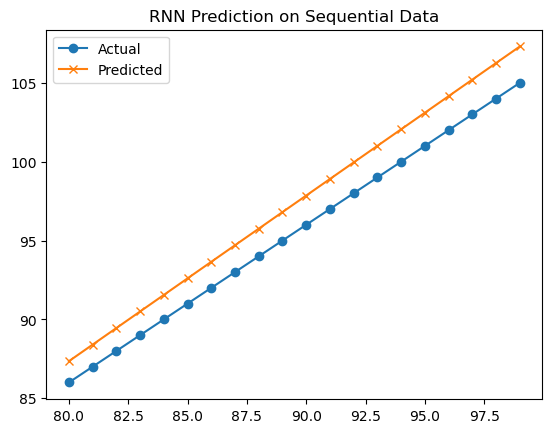

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

# Generate synthetic sequential data
X = np.array([[i, i+2, i+4] for i in range(100)])
y = np.array([i+6 for i in range(100)])

# Reshape X for RNN input (samples, timesteps, features)
X = X.reshape((100, 3, 1))  # 100 sequences, 3 time steps, 1 feature each

# Split into training and testing sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Build RNN model
model = Sequential([
    SimpleRNN(10, activation='relu', input_shape=(3, 1)),  # RNN layer with 10 hidden units
    Dense(1)  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
history = model.fit(X_train, y_train, epochs=100, verbose=0)

# Predict on test data
y_pred = model.predict(X_test)

# Plot actual vs. predicted values
plt.plot(range(80, 100), y_test, label="Actual", marker='o')
plt.plot(range(80, 100), y_pred, label="Predicted", marker='x')
plt.legend()
plt.title("RNN Prediction on Sequential Data")
plt.show()
